In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import LearningCurveDisplay, learning_curve

In [7]:
bank_data = pd.read_csv('data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [9]:
try:
    bank_data.describe().to_csv("Describe.csv")
except:
    pass

In [10]:
[print(col) for col in bank_data if bank_data[col].isna().sum() > 0]
print(bank_data.duplicated().sum())

0


In [11]:
bank_data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

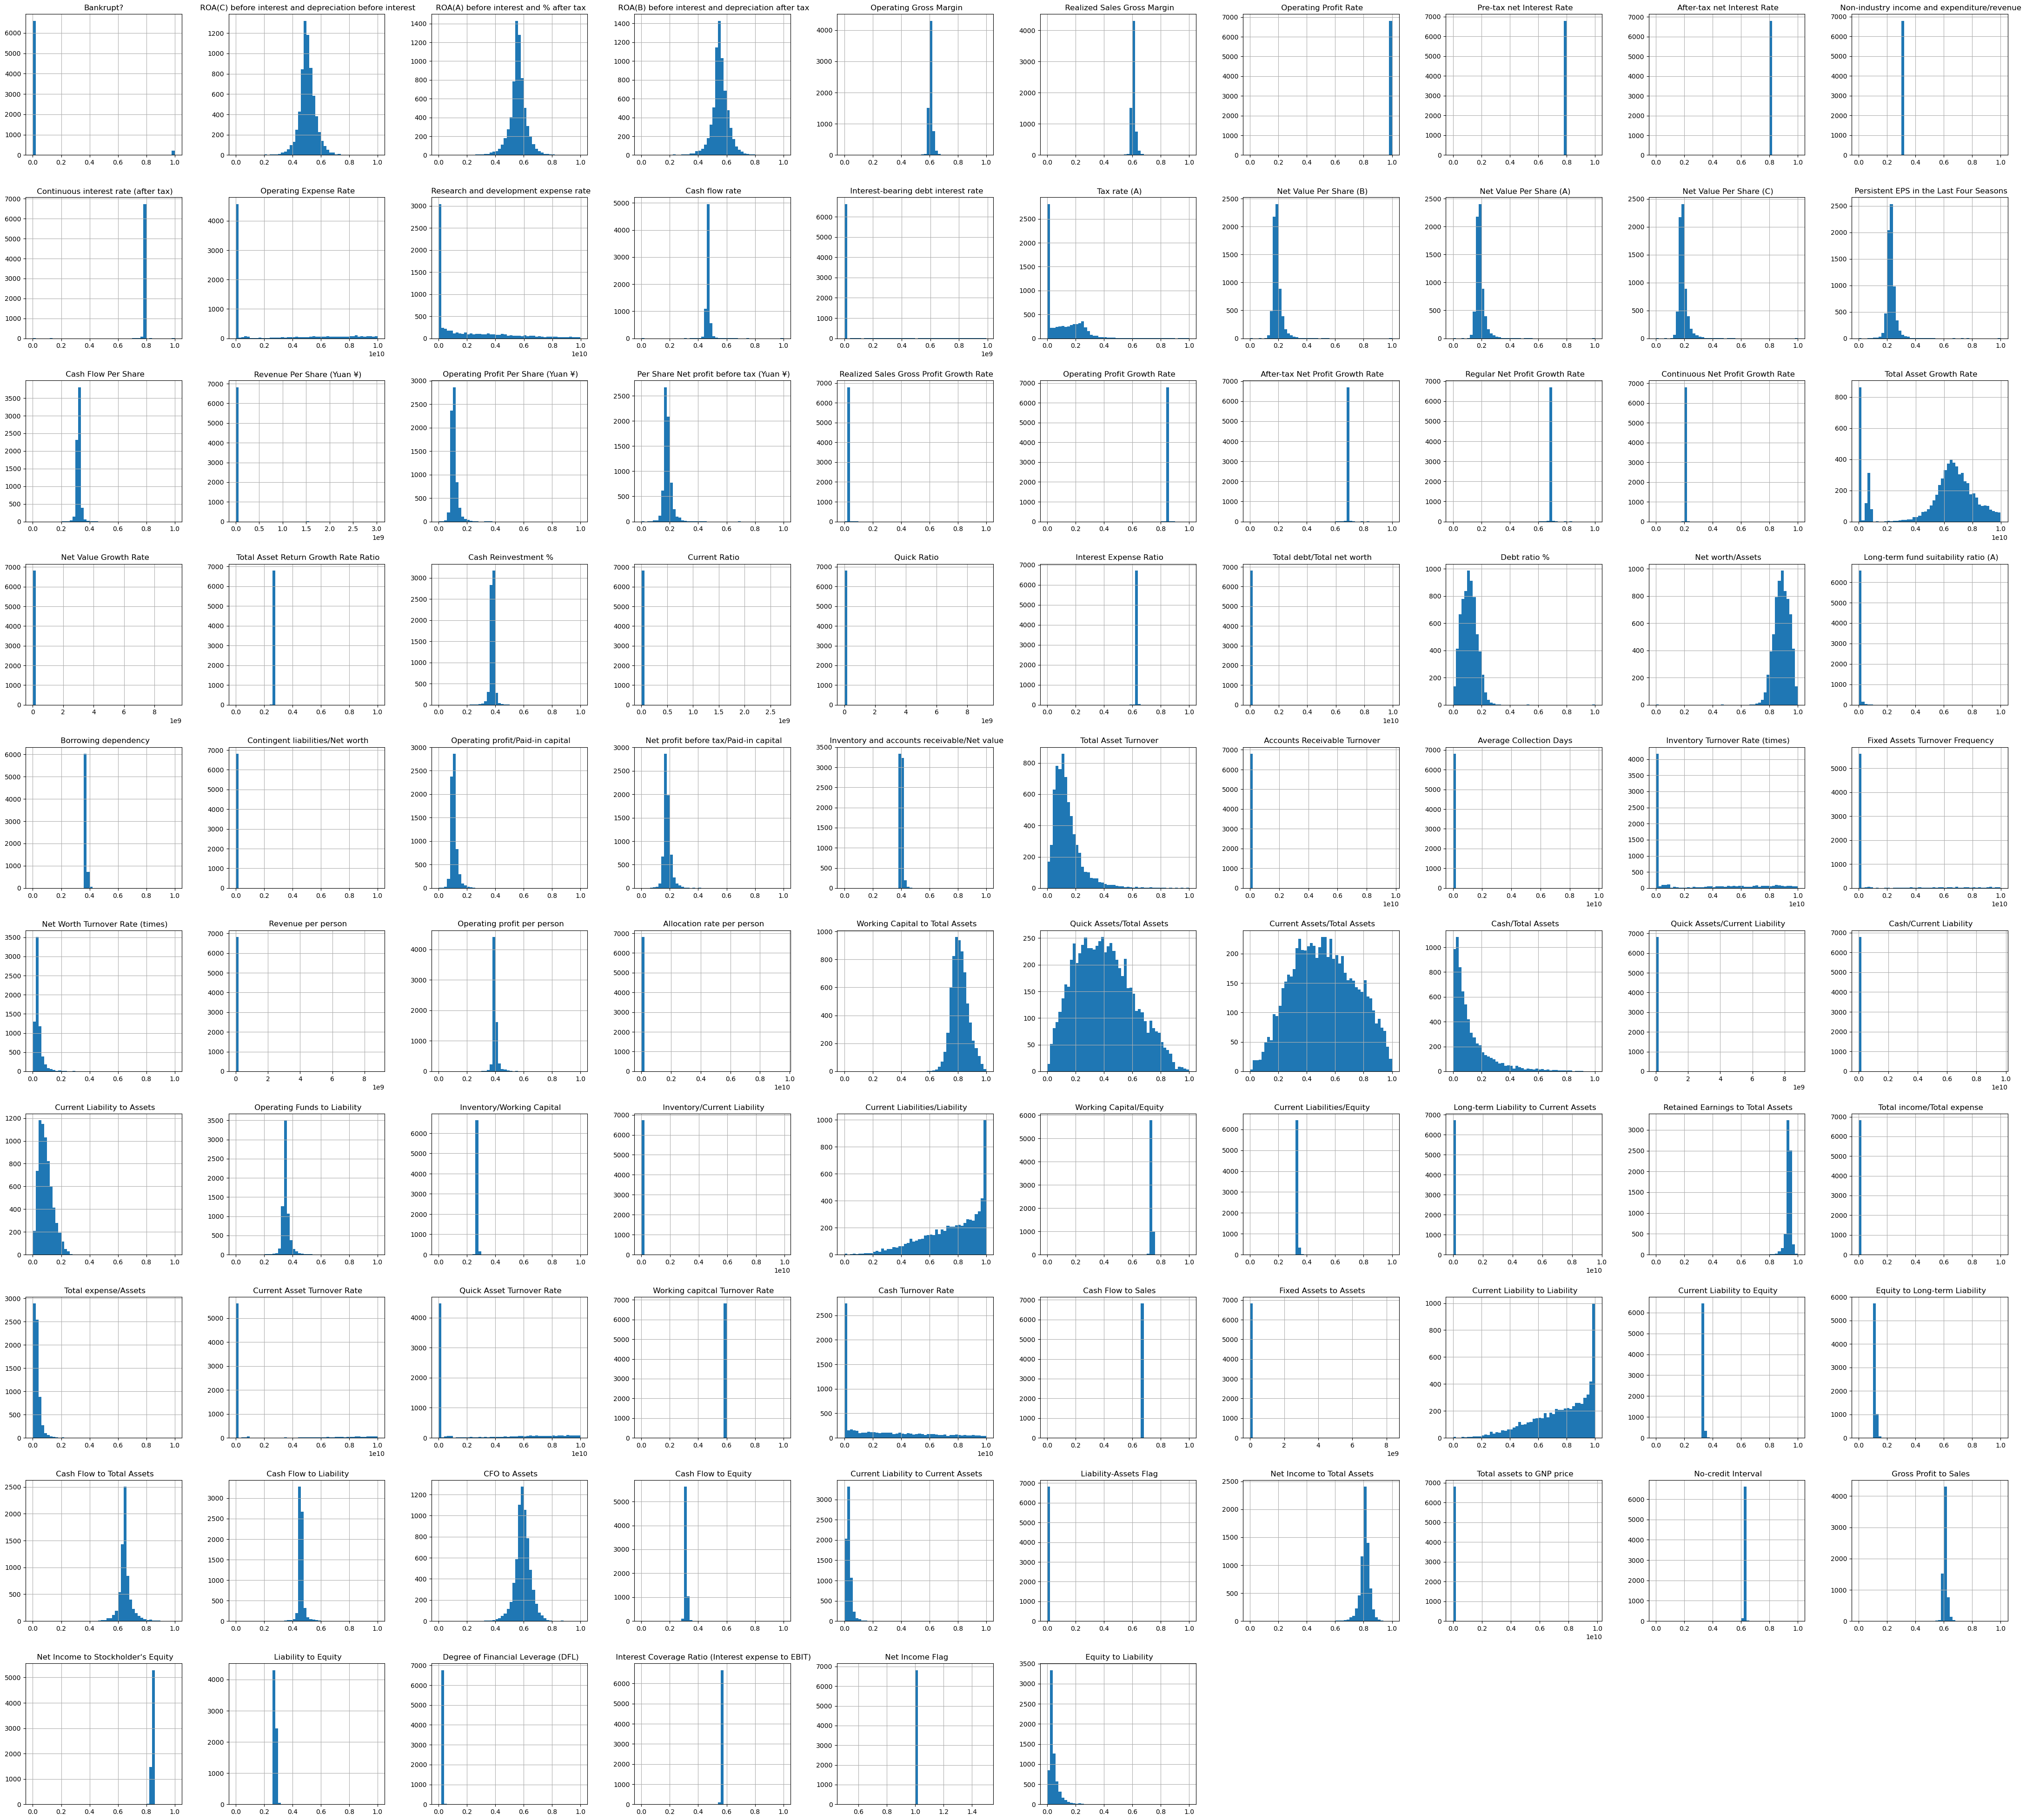

In [12]:
bank_data.hist(figsize = (55,50), bins = 50)
plt.show()

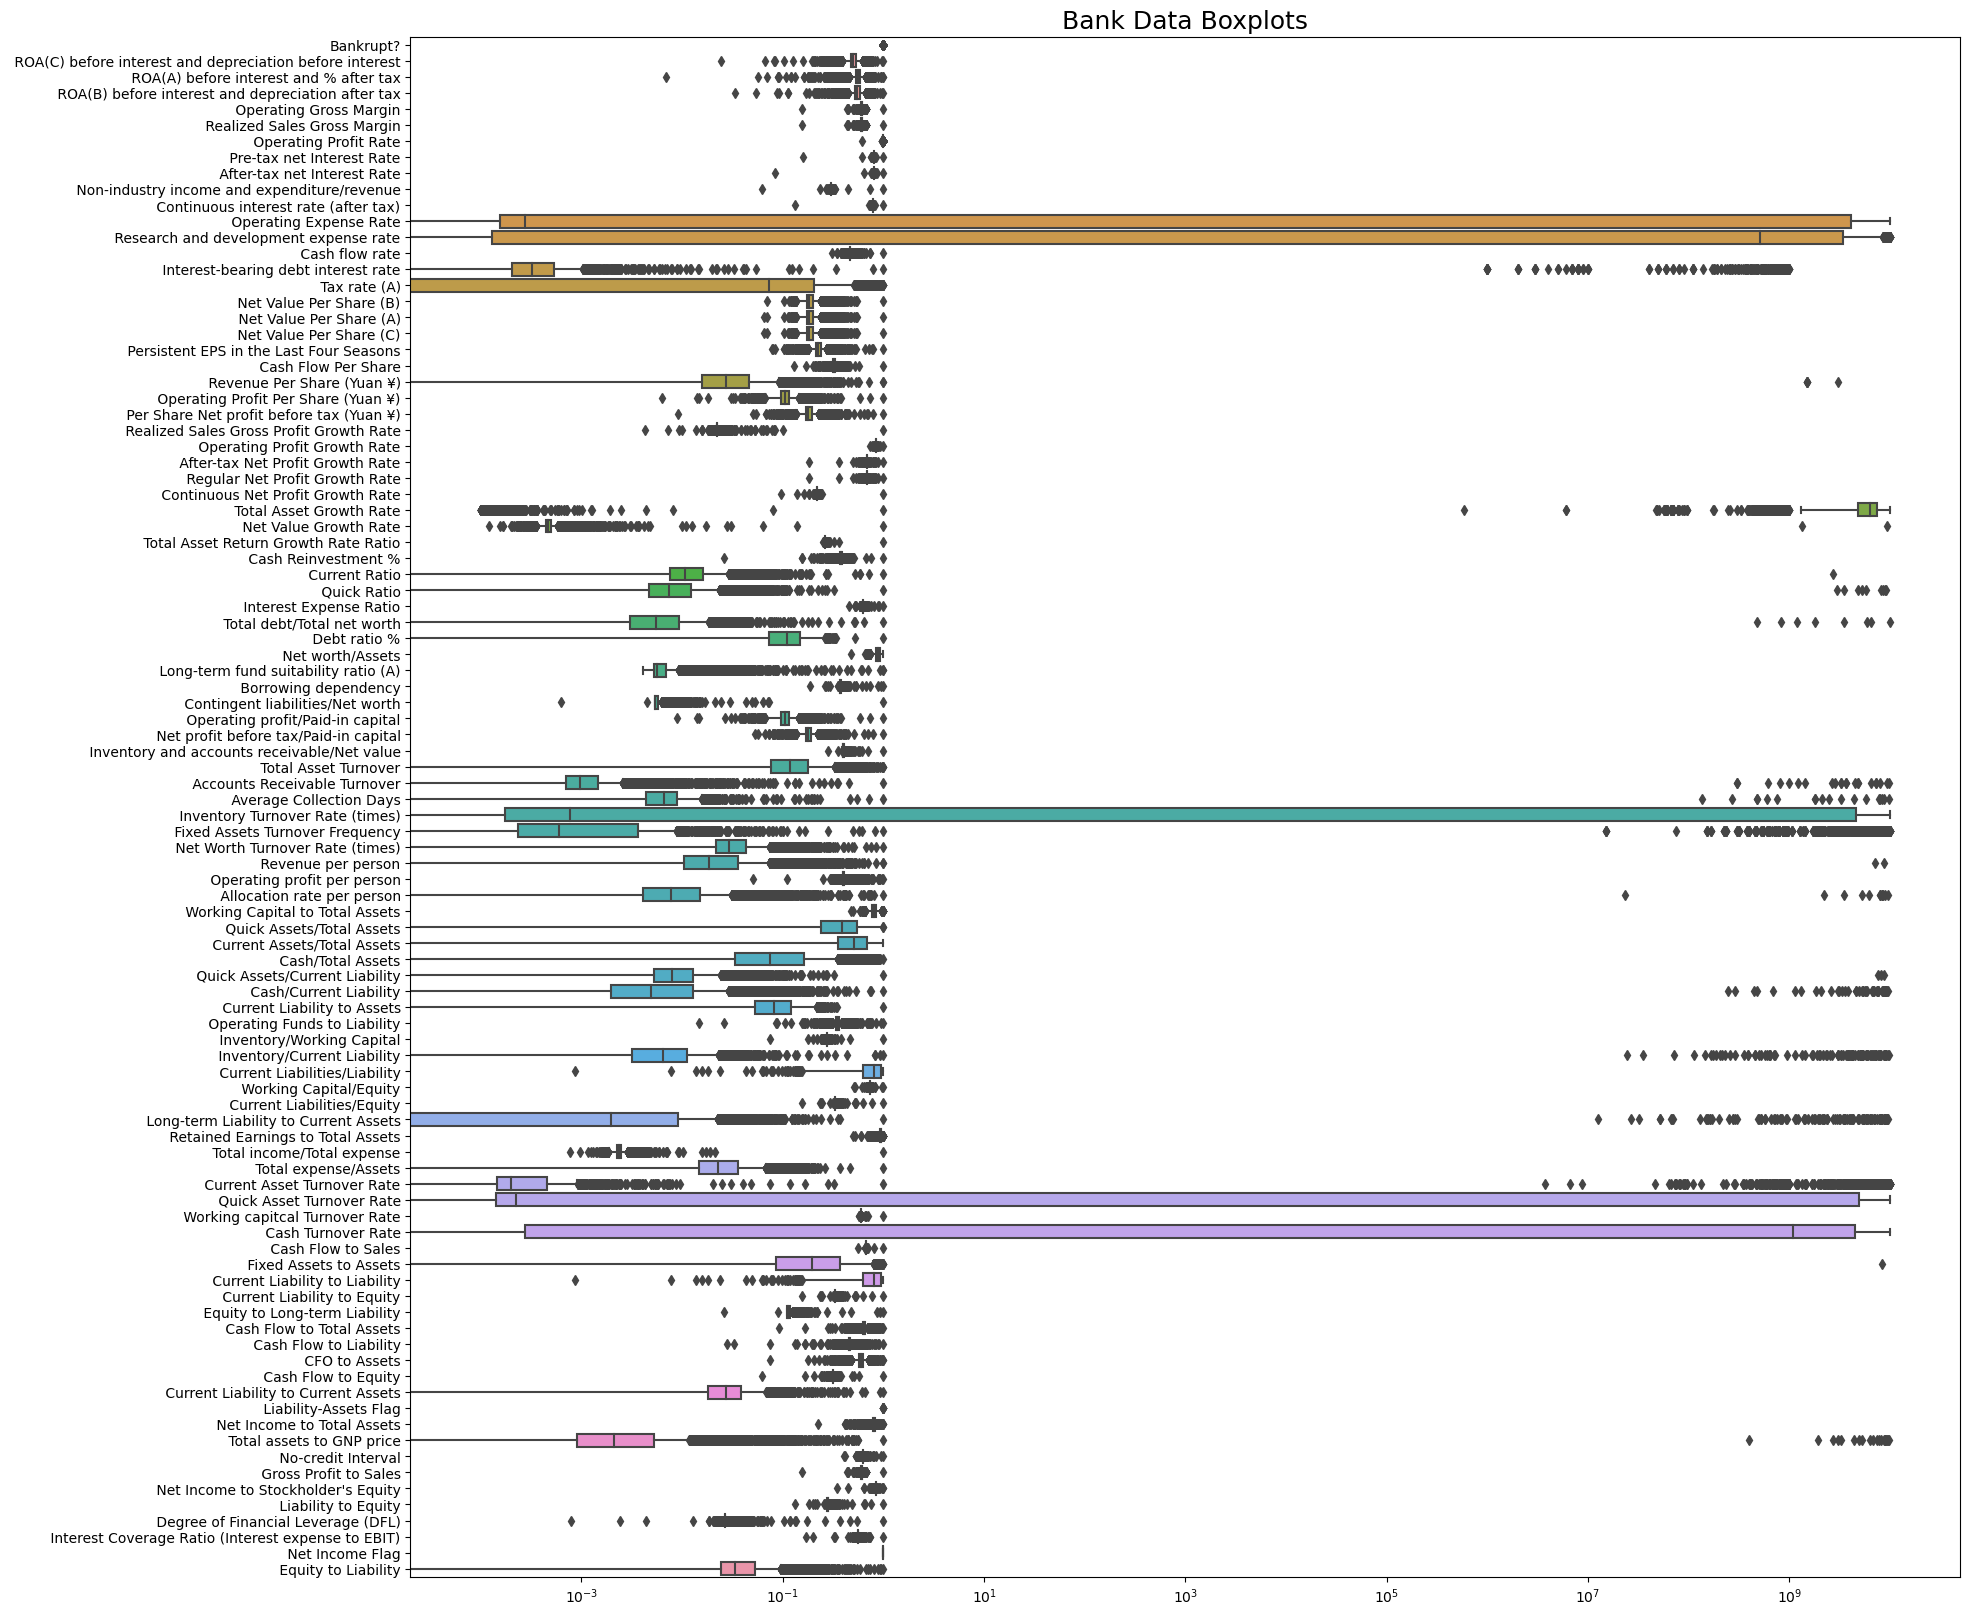

In [13]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = bank_data, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [14]:
y = bank_data['Bankrupt?']
X = bank_data.drop(['Bankrupt?'], axis = 1)

In [15]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [16]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

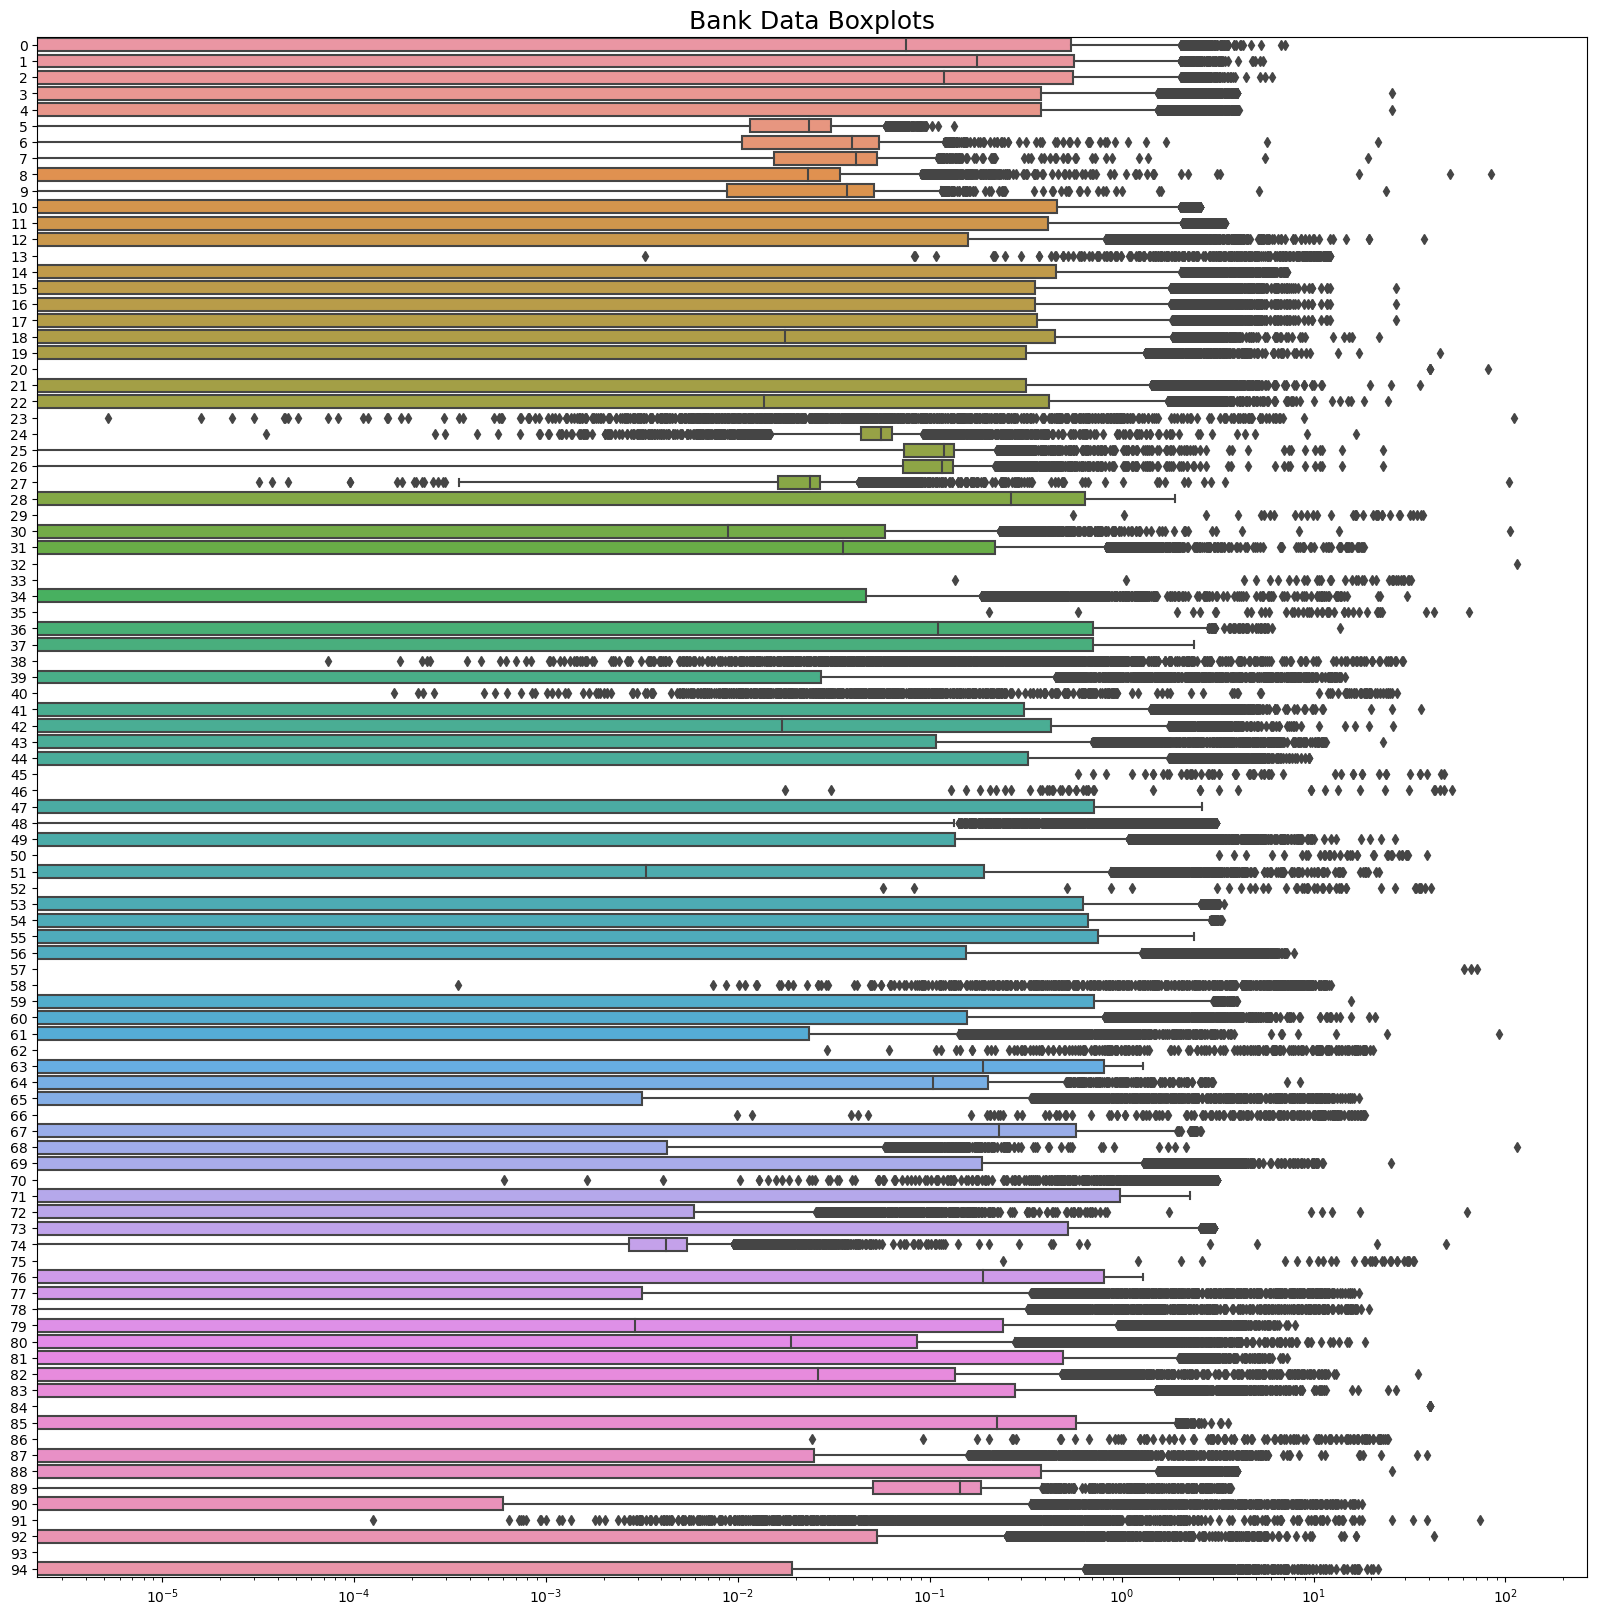

In [17]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = X_scale, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.2)
X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X, y,test_size=0.2)

In [20]:
svc = SVC()
svc_or = SVC()
dtree = DecisionTreeClassifier()
dtree_or = DecisionTreeClassifier()
nueral = MLPClassifier()

In [21]:
import time

def gettime(func):
    def func_wrapper(*args, **kwargs):
        start_time = time.time()
        result  = func(*args, **kwargs)
        opreation_time = time.time() - start_time
        print("function {} completed in  {} seconds".format(
            func.__name__,
            opreation_time))
        return result  + opreation_time
    return func_wrapper


def model_evaluation(classifier,X_train, X_test, y_train, y_test):
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    name = classifier. __class__. __name__
    print(f'The Training Accuracy of the {name} is ', accuracy_score(y_train, yt_pred))
    print(f'The Testing Accuracy of the {name} is ', accuracy_score(y_test, y_pred))
    @gettime
    def timer(x):
        classifier.predict(X_train)
        return x
    time_result = timer(0)
    return [(accuracy_score(y_train, yt_pred) * 100), (accuracy_score(y_test, y_pred) * 100),
            time_result]




KNN MODEL


In [22]:
def knn_modeling(X_train, X_test, y_train, y_test):
    knn_models = {}

    for n in range(1,10) :
        knn = KNeighborsClassifier(n_neighbors= n)
        knn.fit(X_train, y_train)
        knn1 = model_evaluation(knn,X_train, X_test, y_train, y_test)
        knn_models[n] = knn1
    
    return knn_models

In [23]:
knn_result = knn_modeling(X_train, X_test, y_train, y_test)


The Training Accuracy of the KNeighborsClassifier is  1.0
The Testing Accuracy of the KNeighborsClassifier is  0.9723484848484848
function timer completed in  0.49777936935424805 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9997158552756203
The Testing Accuracy of the KNeighborsClassifier is  0.9753787878787878
function timer completed in  0.5063309669494629 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9741428300814549
The Testing Accuracy of the KNeighborsClassifier is  0.9549242424242425
function timer completed in  0.5632669925689697 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9763212729683652
The Testing Accuracy of the KNeighborsClassifier is  0.9606060606060606
function timer completed in  0.5004017353057861 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9585148702405759
The Testing Accuracy of the KNeighborsClassifier is  0.9428030303030303
function timer completed in  0.5087449550628662 seconds
The Train

In [36]:
y1_plot = [i[0] for i in knn_result.values()]
y2_plot = [i[1] for i in knn_result.values()]
y3_plot = [i[2] for i in knn_result.values()]
knn_result.keys()

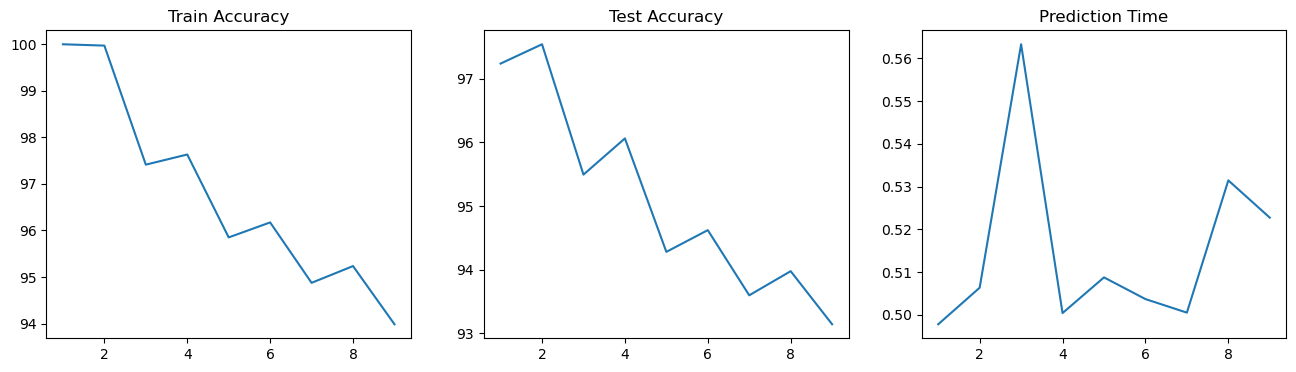

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axes[0].plot(knn_result.keys(), y1_plot)
#axes[0].set_xticklabels(knn_result.keys())
axes[0].set_title("Train Accuracy")

axes[1].plot(knn_result.keys(), y2_plot)
#axes[1].set_xticklabels(knn_result.keys())
axes[1].set_title("Test Accuracy")


axes[2].plot(knn_result.keys(), y3_plot)
#axes[2].set_xticklabels(knn_result.keys())
axes[2].set_title("Prediction Time")

plt.show()

The Training Accuracy of the KNeighborsClassifier is  1.0
The Testing Accuracy of the KNeighborsClassifier is  0.9537878787878787
function timer completed in  0.5437989234924316 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9927069520742565
The Testing Accuracy of the KNeighborsClassifier is  0.9503787878787879
function timer completed in  0.5419502258300781 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9605985982193598
The Testing Accuracy of the KNeighborsClassifier is  0.9329545454545455
function timer completed in  0.5777034759521484 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9600303087706005
The Testing Accuracy of the KNeighborsClassifier is  0.9318181818181818
function timer completed in  0.5102441310882568 seconds
The Training Accuracy of the KNeighborsClassifier is  0.9398560333396476
The Testing Accuracy of the KNeighborsClassifier is  0.9193181818181818
function timer completed in  0.5347232818603516 seconds
The Traini

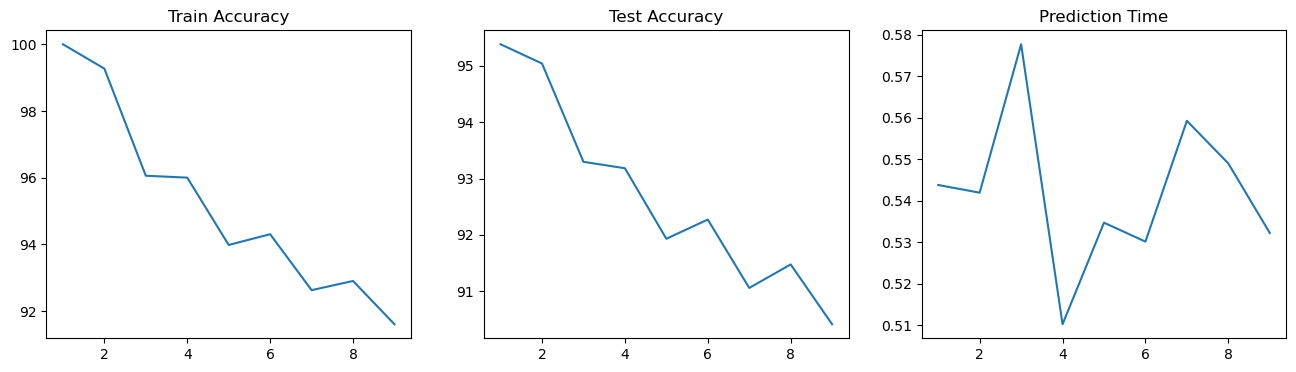

In [41]:
knn_result_or = knn_modeling(X_train_or, X_test_or, y_train_or, y_test_or)
y1_plot = [i[0] for i in knn_result_or.values()]
y2_plot = [i[1] for i in knn_result_or.values()]
y3_plot = [i[2] for i in knn_result_or.values()]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

axes[0].plot(knn_result_or.keys(), y1_plot)
#axes[0].set_xticklabels(knn_result_or.keys())
axes[0].set_title("Train Accuracy")

axes[1].plot(knn_result_or.keys(), y2_plot)
#axes[1].set_xticklabels(knn_result_or.keys())
axes[1].set_title("Test Accuracy")


axes[2].plot(knn_result_or.keys(), y3_plot)
#axes[2].set_xticklabels(knn_result_or.keys())
axes[2].set_title("Prediction Time")

plt.show()


SVM

In [27]:
svc.fit(X_train, y_train)

model_evaluation(svc,X_train, X_test, y_train, y_test)



The Training Accuracy of the SVC is  0.961356317484372
The Testing Accuracy of the SVC is  0.9549242424242425
function timer completed in  2.3492636680603027 seconds


[96.1356317484372, 95.49242424242425, 2.3492636680603027]

In [28]:
svc_or.fit(X_test_or, y_test_or)
model_evaluation(svc_or,X_train_or, X_test_or, y_train_or, y_test_or)

The Training Accuracy of the SVC is  0.788122750520932
The Testing Accuracy of the SVC is  0.8125
function timer completed in  1.5832102298736572 seconds


[78.8122750520932, 81.25, 1.5832102298736572]

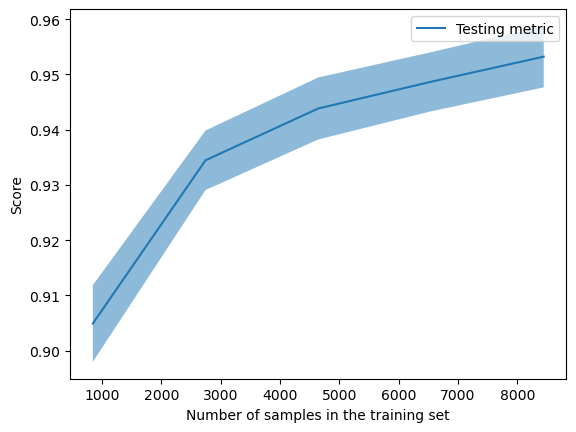

In [42]:
train_sizes, train_scores, test_scores = learning_curve(
svc, X_train, y_train)
display = LearningCurveDisplay(train_sizes=train_sizes,
train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

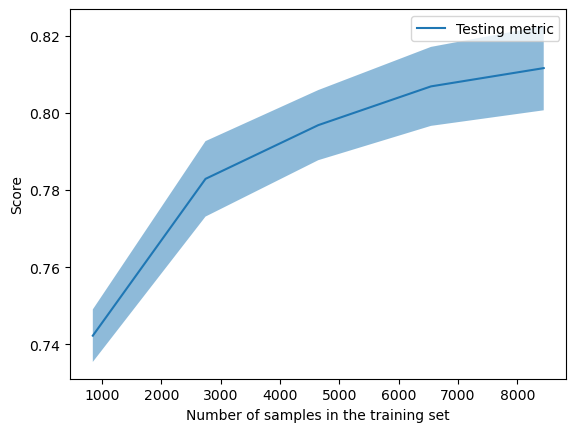

In [43]:
train_sizes, train_scores, test_scores = learning_curve(
svc_or, X_train_or, y_train_or)
display = LearningCurveDisplay(train_sizes=train_sizes,
train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()

Desicion Tree & Boosting


In [31]:
dtree.fit(X_train, y_train)
dtree_or.fit(X_train_or, y_train_or)
model_evaluation(dtree,X_train, X_test, y_train, y_test)
model_evaluation(dtree_or,X_train_or, X_test_or, y_train_or, y_test_or)

The Training Accuracy of the DecisionTreeClassifier is  1.0
The Testing Accuracy of the DecisionTreeClassifier is  0.9462121212121212
function timer completed in  0.0039975643157958984 seconds
The Training Accuracy of the DecisionTreeClassifier is  1.0
The Testing Accuracy of the DecisionTreeClassifier is  0.9587121212121212
function timer completed in  0.005997657775878906 seconds


[100.0, 95.87121212121212, 0.005997657775878906]

Boost


In [52]:

adaboost = AdaBoostClassifier(n_estimators=70, base_estimator=dtree,learning_rate=1)
adaboost.fit(X_train, y_train)
adaboost_or = AdaBoostClassifier(n_estimators=70, base_estimator=dtree_or,learning_rate=1)
adaboost_or.fit(X_train_or, y_train_or)
model_evaluation(adaboost,X_train, X_test, y_train, y_test)
model_evaluation(adaboost_or,X_train_or, X_test_or, y_train_or, y_test_or)


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


The Training Accuracy of the AdaBoostClassifier is  1.0
The Testing Accuracy of the AdaBoostClassifier is  0.95
function timer completed in  0.0045087337493896484 seconds
The Training Accuracy of the AdaBoostClassifier is  1.0
The Testing Accuracy of the AdaBoostClassifier is  0.9598484848484848
function timer completed in  0.008004188537597656 seconds


[100.0, 95.98484848484848, 0.008004188537597656]

In [58]:
for i in range(3,5):
    cl = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=i)
    cl.fit(X_train, y_train)
    model_evaluation(cl,X_train, X_test, y_train, y_test)

The Training Accuracy of the GradientBoostingClassifier is  1.0
The Testing Accuracy of the GradientBoostingClassifier is  0.9757575757575757
function timer completed in  0.013004541397094727 seconds
The Training Accuracy of the GradientBoostingClassifier is  1.0
The Testing Accuracy of the GradientBoostingClassifier is  0.9803030303030303
function timer completed in  0.015996694564819336 seconds


Neural Network

c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9373934457283576
The Testing Accuracy of the MLPClassifier is  0.9306818181818182
function timer completed in  0.0030066967010498047 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9544421291911347
The Testing Accuracy of the MLPClassifier is  0.9458333333333333
function timer completed in  0.003001689910888672 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9615457473006251
The Testing Accuracy of the MLPClassifier is  0.9503787878787879
function timer completed in  0.001997232437133789 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9832354612616026
The Testing Accuracy of the MLPClassifier is  0.968560606060606
function timer completed in  0.003000974655151367 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9849403296078802
The Testing Accuracy of the MLPClassifier is  0.968560606060606
function timer completed in  0.0030028820037841797 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9948853949611669
The Testing Accuracy of the MLPClassifier is  0.9799242424242425
function timer completed in  0.0020017623901367188 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9873082023110438
The Testing Accuracy of the MLPClassifier is  0.968560606060606
function timer completed in  0.00400543212890625 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9995264254593673
The Testing Accuracy of the MLPClassifier is  0.984469696969697
function timer completed in  0.0030002593994140625 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.9989581360106081
The Testing Accuracy of the MLPClassifier is  0.9833333333333333
function timer completed in  0.0019996166229248047 seconds
The Training Accuracy of the MLPClassifier is  0.9986739912862285
The Testing Accuracy of the MLPClassifier is  0.9848484848484849
function timer completed in  0.003998279571533203 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  1.0
The Testing Accuracy of the MLPClassifier is  0.9829545454545454
function timer completed in  0.0059967041015625 seconds
The Training Accuracy of the MLPClassifier is  0.9999052850918735
The Testing Accuracy of the MLPClassifier is  0.9852272727272727
function timer completed in  0.005002021789550781 seconds
The Training Accuracy of the MLPClassifier is  1.0
The Testing Accuracy of the MLPClassifier is  0.9787878787878788
function timer completed in  0.007999420166015625 seconds
The Training Accuracy of the MLPClassifier is  1.0
The Testing Accuracy of the MLPClassifier is  0.9837121212121213
function timer completed in  0.0069980621337890625 seconds
The Training Accuracy of the MLPClassifier is  1.0
The Testing Accuracy of the MLPClassifier is  0.9833333333333333
function timer completed in  0.004996776580810547 seconds
The Training Accuracy of the MLPClassifier is  1.0
The Testing Accuracy of the MLPClassifier is  0.9848484848484849


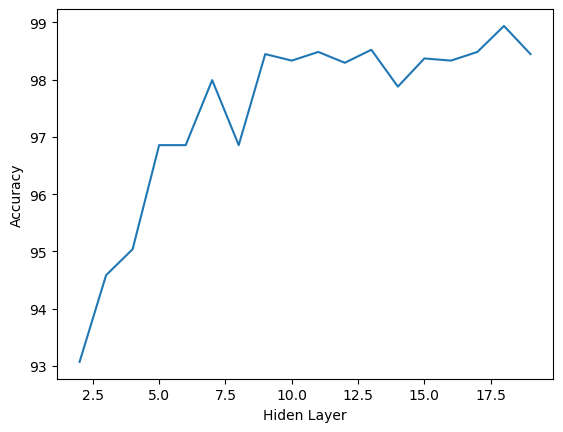

In [72]:
plot_x = []
plot_y = []
for i in range(2,20):
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i,))
    mlp.fit(X_train, y_train)
    res = model_evaluation(mlp,X_train, X_test, y_train, y_test)
    plot_x.append(i)
    plot_y.append(res[1])


plt.plot(plot_x, plot_y)
plt.xlabel("Hiden Layer")
plt.ylabel("Accuracy")
plt.show()

c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (st

The Training Accuracy of the MLPClassifier is  0.5334343625686683
The Testing Accuracy of the MLPClassifier is  0.5340909090909091
function timer completed in  0.005000114440917969 seconds
The Training Accuracy of the MLPClassifier is  0.4581360106080697
The Testing Accuracy of the MLPClassifier is  0.45227272727272727
function timer completed in  0.004999876022338867 seconds
The Training Accuracy of the MLPClassifier is  0.4948853949611669
The Testing Accuracy of the MLPClassifier is  0.5
function timer completed in  0.005003213882446289 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (st

The Training Accuracy of the MLPClassifier is  0.5354233756393256
The Testing Accuracy of the MLPClassifier is  0.5511363636363636
function timer completed in  0.0060007572174072266 seconds
The Training Accuracy of the MLPClassifier is  0.5060617541200985
The Testing Accuracy of the MLPClassifier is  0.4965909090909091
function timer completed in  0.006006002426147461 seconds
The Training Accuracy of the MLPClassifier is  0.5431899981057018
The Testing Accuracy of the MLPClassifier is  0.5424242424242425
function timer completed in  0.006001949310302734 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (st

The Training Accuracy of the MLPClassifier is  0.43862473953400266
The Testing Accuracy of the MLPClassifier is  0.425
function timer completed in  0.005002737045288086 seconds
The Training Accuracy of the MLPClassifier is  0.508619056639515
The Testing Accuracy of the MLPClassifier is  0.5128787878787879
function timer completed in  0.004999876022338867 seconds
The Training Accuracy of the MLPClassifier is  0.45358969501799584
The Testing Accuracy of the MLPClassifier is  0.4503787878787879
function timer completed in  0.0050013065338134766 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.5278461829892025
The Testing Accuracy of the MLPClassifier is  0.5340909090909091
function timer completed in  0.011511802673339844 seconds
The Training Accuracy of the MLPClassifier is  0.47490054934646714
The Testing Accuracy of the MLPClassifier is  0.4662878787878788
function timer completed in  0.008017539978027344 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.45311612047736316
The Testing Accuracy of the MLPClassifier is  0.43636363636363634
function timer completed in  0.006999969482421875 seconds
The Training Accuracy of the MLPClassifier is  0.5021784428869104
The Testing Accuracy of the MLPClassifier is  0.5109848484848485
function timer completed in  0.00899958610534668 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.48977078992233375
The Testing Accuracy of the MLPClassifier is  0.484469696969697
function timer completed in  0.010511159896850586 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.49772684220496305
The Testing Accuracy of the MLPClassifier is  0.5102272727272728
function timer completed in  0.011000633239746094 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.5000947149081265
The Testing Accuracy of the MLPClassifier is  0.49886363636363634
function timer completed in  0.012022972106933594 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The Training Accuracy of the MLPClassifier is  0.4737639704489487
The Testing Accuracy of the MLPClassifier is  0.4746212121212121
function timer completed in  0.01099705696105957 seconds
The Training Accuracy of the MLPClassifier is  0.5221632885016102
The Testing Accuracy of the MLPClassifier is  0.5276515151515152
function timer completed in  0.012004613876342773 seconds


c:\Users\Zaniar.J\anaconda3\envs\assignment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


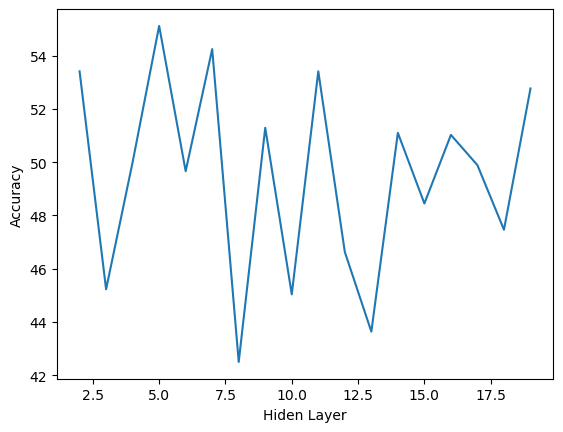

In [73]:
plot_x = []
plot_y = []
for i in range(2,20):
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i,))
    mlp.fit(X_train_or, y_train_or)
    res = model_evaluation(mlp,X_train_or, X_test_or, y_train_or, y_test_or)
    plot_x.append(i)
    plot_y.append(res[1])


plt.plot(plot_x, plot_y)
plt.xlabel("Hiden Layer")
plt.ylabel("Accuracy")
plt.show()

In [33]:
#https://www.kaggle.com/code/gcmadhan/bankruptcy-perdiction-96-accuracy